In [1]:
# ライブラリ読み込み
import pandas as pd

from load_data import load2d
from saver import load_arch
from plotter import plot_samples

Using TensorFlow backend.


In [8]:
model_name = 'model7'
model_arch = 'model/' + model_name + '-arch-5000.json'
model_weights = 'model/' + model_name + '-weights-5000.hdf5'
outpath = 'results/' + model_name + '-5000.csv'

In [3]:
# IdLookupTable.csvのFeatureNameとprediction(None, 30)のindexを紐付ける
mappings = {
  'left_eye_center_x':          0,
  'left_eye_center_y':          1,
  'right_eye_center_x':         2,
  'right_eye_center_y':         3,
  'left_eye_inner_corner_x':    4,
  'left_eye_inner_corner_y':    5,
  'left_eye_outer_corner_x':    6,
  'left_eye_outer_corner_y':    7,
  'right_eye_inner_corner_x':   8,
  'right_eye_inner_corner_y':   9,
  'right_eye_outer_corner_x':   10,
  'right_eye_outer_corner_y':   11,
  'left_eyebrow_inner_end_x':   12,
  'left_eyebrow_inner_end_y':   13,
  'left_eyebrow_outer_end_x':   14,
  'left_eyebrow_outer_end_y':   15,
  'right_eyebrow_inner_end_x':  16,
  'right_eyebrow_inner_end_y':  17,
  'right_eyebrow_outer_end_x':  18,
  'right_eyebrow_outer_end_y':  19,
  'nose_tip_x':                 20,
  'nose_tip_y':                 21,
  'mouth_left_corner_x':        22,
  'mouth_left_corner_y':        23,
  'mouth_right_corner_x':       24,
  'mouth_right_corner_y':       25,
  'mouth_center_top_lip_x':     26,
  'mouth_center_top_lip_y':     27,
  'mouth_center_bottom_lip_x':  28,
  'mouth_center_bottom_lip_y':  29
}

In [4]:
# テストデータ読み込み
X_test2d, _ = load2d(test=True)

ImageId    1783
Image      1783
dtype: int64


In [5]:
# モデル読み込み
model = load_arch(model_arch)
model.load_weights(model_weights)

In [9]:
# 予測
y_test = model.predict(X_test2d)
y_test.shape

(1783, 30)

In [23]:
# 予測から結果へのデータをフィットさせる
# データのスケールを元に戻す、かつ、0〜96の値に正規化する
outputs = []
base_df = pd.read_csv('./data/IdLookupTable.csv')
for imageId in range(1, 1783+1):
    y_pred = y_test[imageId-1] # 1から始まるので0からにするため-1に。
    specified_image_id_df = base_df[base_df['ImageId'] == imageId]
    for _, row in specified_image_id_df.iterrows():
        row_id = row['RowId']
        feature_name = row['FeatureName']
        mapped_index = mappings[feature_name]
        pred_value = y_pred[mapped_index] * 48 + 48
        if pred_value > 96.0:
            pred_value = 96.0
        if pred_value < 0.0:
            pred_value = 0.0
        outputs.append([row_id, pred_value])

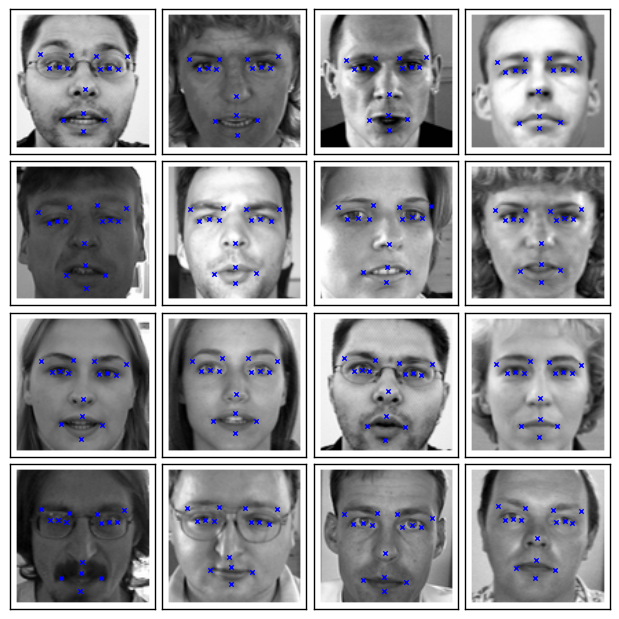

In [26]:
# モデル7の予測を表示
plot_samples(X_test2d, y_test)

In [28]:
# CSVで書き出す
output_df = pd.DataFrame(outputs, columns=['RowId', 'Location'])
output_df.to_csv(outpath, index=False)